# Visualizations

Through the crime dataset, I will try to visualize trends and correlations through the following techniques:

1. Bubbble chart
2. Bar graph (between grouped variables)
3. Circle graphs
    a. 
4. Heatmap (between grouped variables)
5. Violin plot

Marimekko charts and dot matrix charts cannot be used as it is unsuitable for this continuous quantiative data.

Populating the interactive namespace from numpy and matplotlib


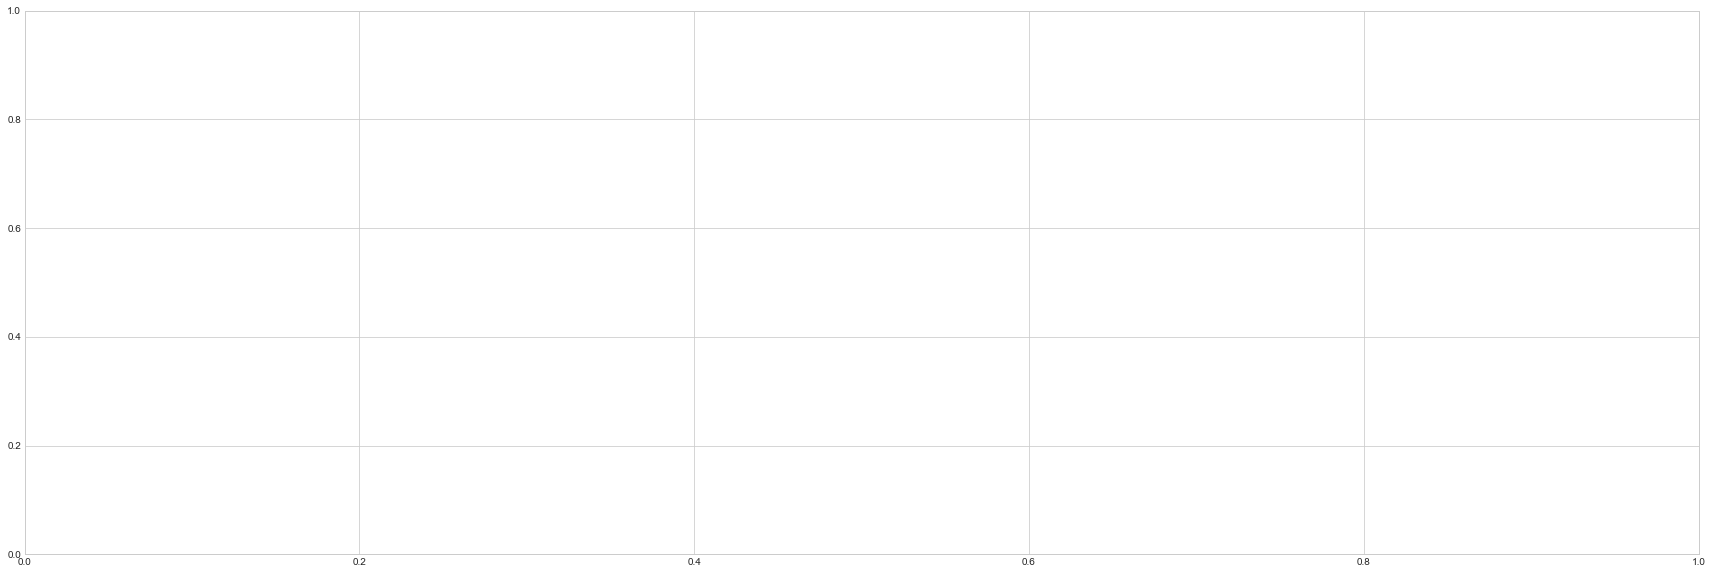

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

plotly.tools.set_credentials_file(username='akasi311', api_key='b1iufTtULEUAxoDkIH9i')

%pylab inline
pylab.rcParams['figure.figsize'] = (11, 11)
sns.set_style("whitegrid")

df = pd.read_csv("../data/processed/cleaned.csv")
df.head()

#Figure size:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(30, 10)



## Bubble chart

In [8]:
# Percent black vs crime
size = df[["PctNotSpeakEnglWell:"]]

trace0 = go.Scatter(
    x= df[["PctRecentImmig:"]],
    y=df["ViolentCrimesPerPop:"],
    mode='markers',
    marker=dict(
        size= size,
        sizeref=2.*max(size)/(40.**2),
        sizemode='area'
    )
)

data = [trace0]
py.iplot(data)

TypeError: can't multiply sequence by non-int of type 'float'

## Bar graph

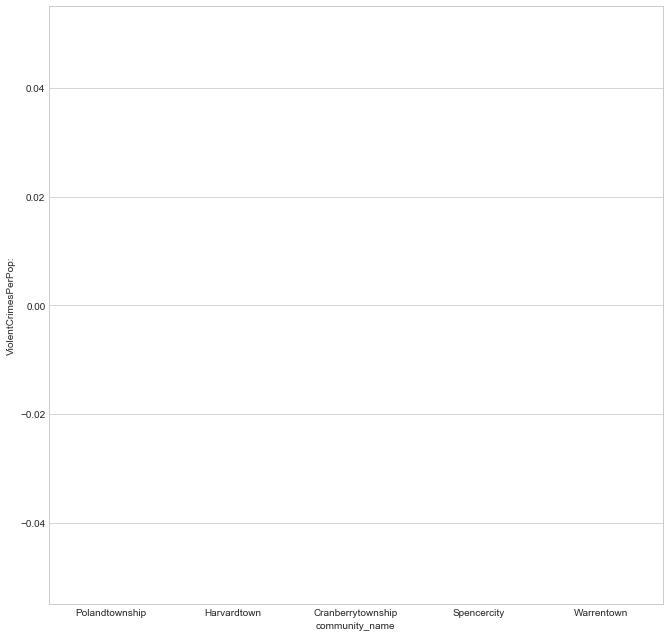

In [18]:
practice_data = df[0:5]

sns.barplot(x = "community_name", y = "ViolentCrimesPerPop:", data = practice_data)

In [9]:
model_metrics = pd.DataFrame({"Model": pd.Categorical(["Linear Regression","Stepwise Regression","Relaxed LASSO","xgboost","Random Forest"]),
    "RMSE": pd.Series([0.1450994,0.1455873,0.703378,0.13652815,0.1351691], dtype = 'float32'),
    "R Squared": pd.Series([0.6556255,0.6533207,0.6613930,0.64856267,0], dtype = 'float32')}
)

print(model_metrics)




                 Model  R Squared      RMSE
0    Linear Regression   0.655626  0.145099
1  Stepwise Regression   0.653321  0.145587
2        Relaxed LASSO   0.661393  0.703378
3              xgboost   0.648563  0.136528
4        Random Forest   0.000000  0.135169


In [ ]:
sns.barplot(x = "Model", y = "RMSE", data = model_metrics)

In [3]:
# Bad cities
vernonCity = df.loc[df['community_name'] == "Vernoncity"]
batonRouge = df.loc[df['community_name'] == "BatonRougecity"]
plantCity = df.loc[df['community_name'] == "PlantCitycity"]
spartanburgCity = df.loc[df['community_name'] == "Spartanburgcity"]
atlanticCity = df.loc[df['community_name'] == "AtlanticCitycity"]

# Good cities
polandTownship = df.loc[df['community_name'] == "Polandtownship"]
harvardTown = df.loc[df['community_name'] == "Harvardtown"]
cranberryTownship = df.loc[df['community_name'] == "Cranberrytownship"]
spencerCity = df.loc[df['community_name'] == "Spencercity"]
warrenTown = df.loc[df['community_name'] == "Warrentown"]

# Appending data
barplotData = vernonCity.append([batonRouge,plantCity,spartanburgCity,atlanticCity, polandTownship, harvardTown,
                                cranberryTownship, spencerCity, warrenTown])


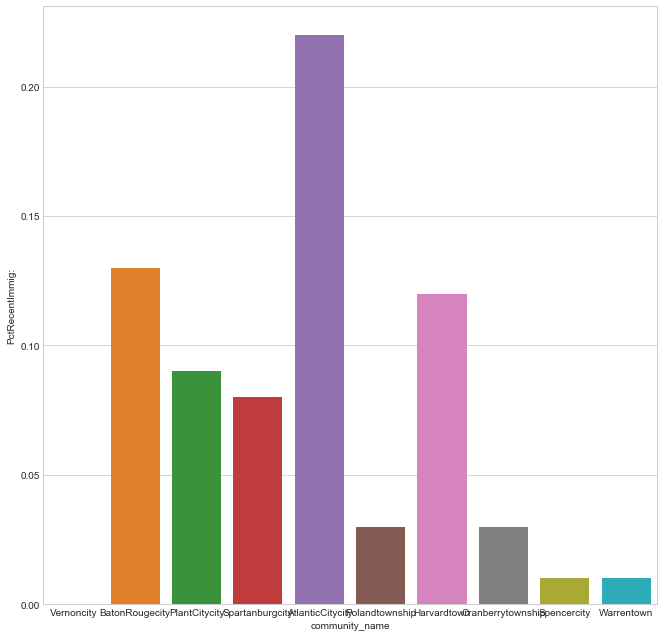

In [4]:
sns.barplot(x = "community_name", y = "PctRecentImmig:", data = barplotData)

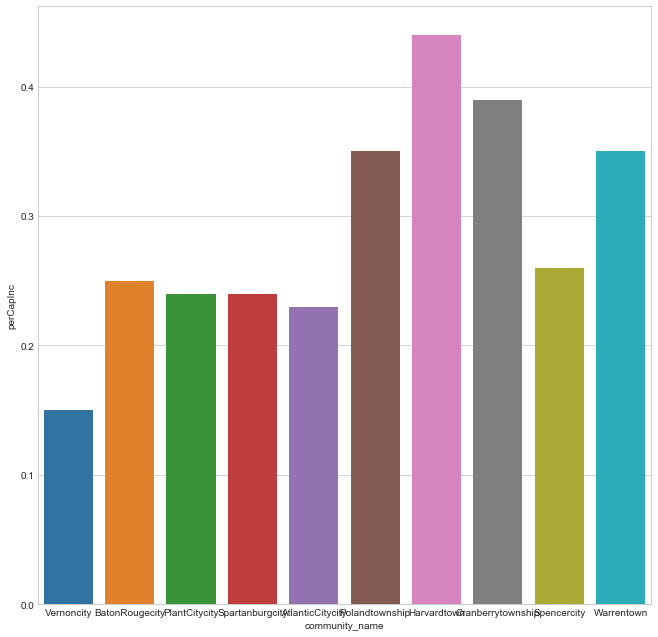

In [21]:
sns.barplot(x = "community_name", y = "perCapInc", data = barplotData)

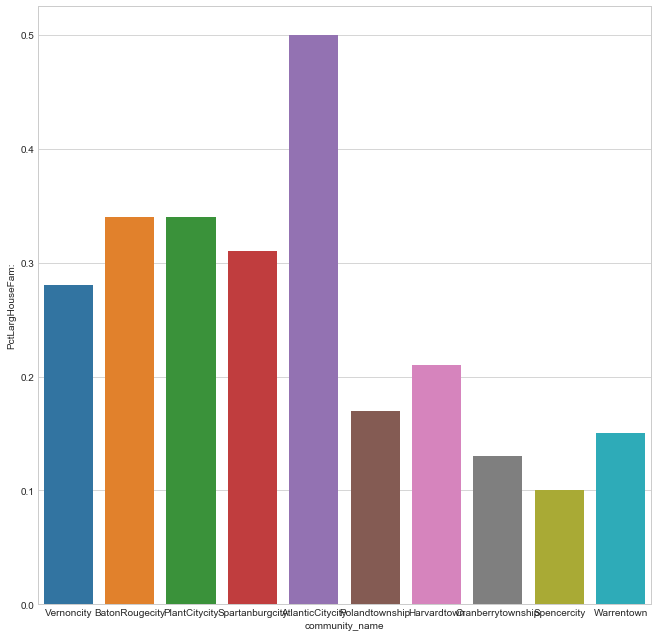

In [13]:
sns.barplot(x = "community_name", y = "PctLargHouseFam:", data = barplotData)

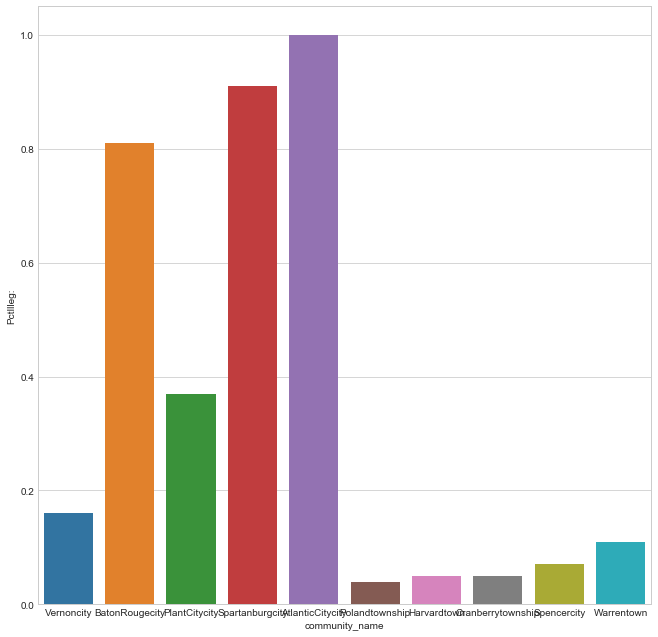

In [22]:
sns.barplot(x = "community_name", y = "PctIlleg:", data = barplotData)

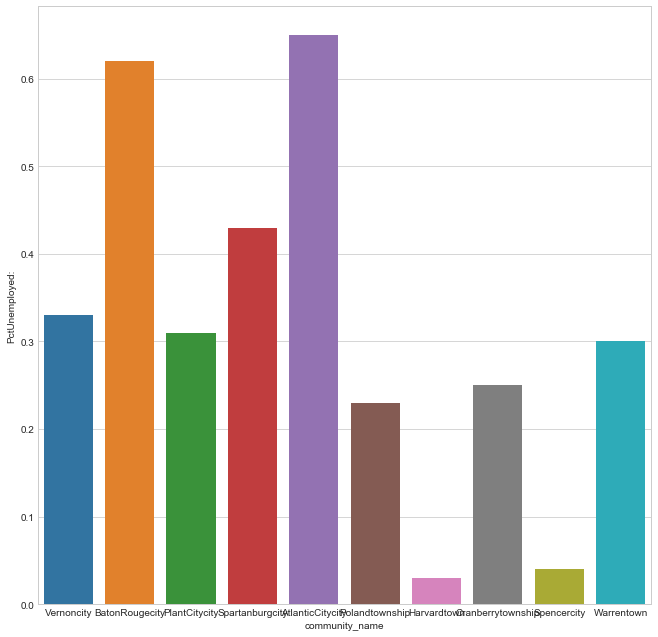

In [23]:
sns.barplot(x = "community_name", y = "PctUnemployed:", data = barplotData)

## Heatmap

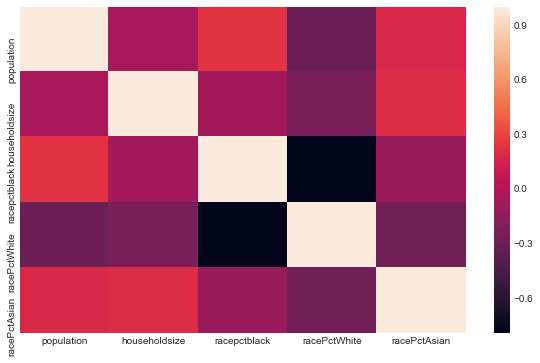

In [42]:
# Demographics
practice_data = df.iloc[:, 1:6]

corr = practice_data.corr()

sns.heatmap(corr)

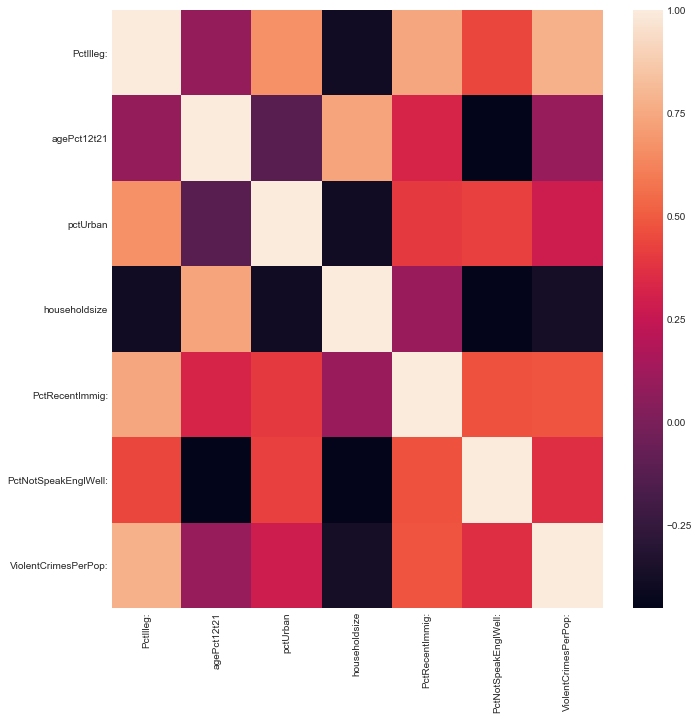

In [18]:
# Demographics

heatmapData = barplotData [["PctIlleg:", "agePct12t21", "pctUrban", "householdsize", "PctRecentImmig:", "PctNotSpeakEnglWell:", "ViolentCrimesPerPop:"]]

corr = heatmapData.corr()

sns.heatmap(corr)

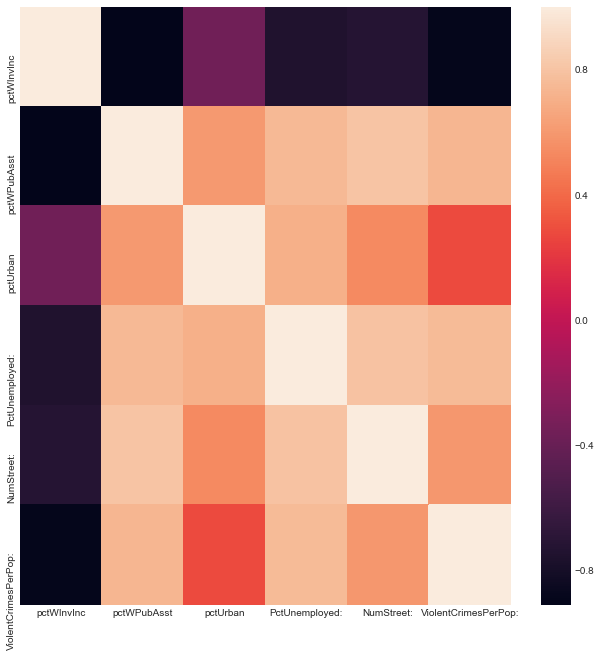

In [16]:
# Socioeconomic

heatmapData = barplotData [["pctWInvInc", "pctWPubAsst", "pctUrban", "PctUnemployed:", "NumStreet:", "ViolentCrimesPerPop:"]]

corr = heatmapData.corr()

sns.heatmap(corr)

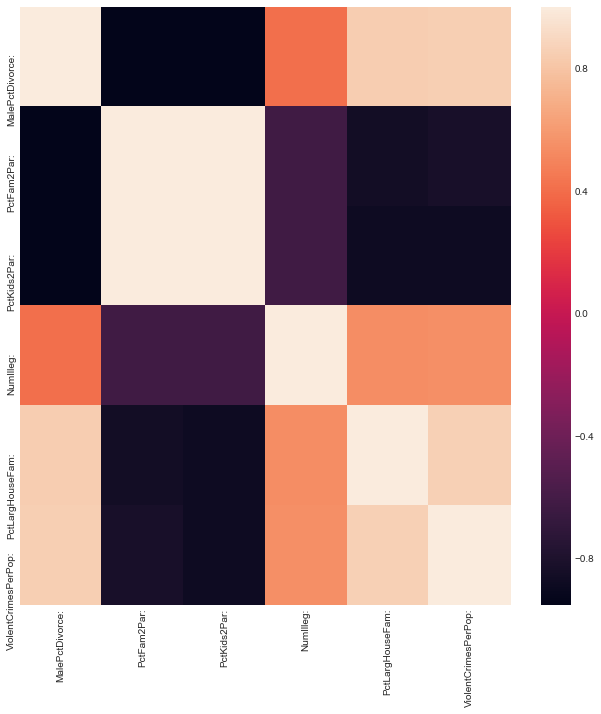

In [22]:
# Parental

heatmapData = barplotData [["MalePctDivorce:", "PctFam2Par:", "PctKids2Par:", "NumIlleg:", "PctLargHouseFam:", "ViolentCrimesPerPop:"]]

corr = heatmapData.corr()

sns.heatmap(corr)

## Violin Plots

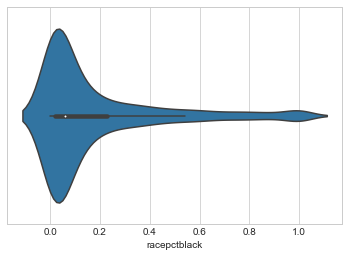

In [12]:
sns.violinplot(df["racepctblack"])

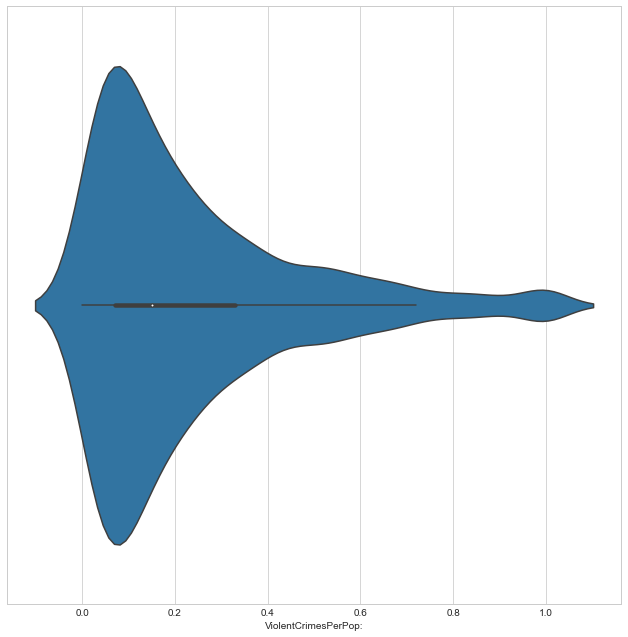

In [11]:
sns.violinplot(df["ViolentCrimesPerPop:"])
pylab.rcParams['figure.figsize'] = (5, 6)

In [7]:

sns.violinplot

1950    0.57
1951    0.28
1952    0.44
1953    0.18
1954    0.00
0       0.95
1       0.97
2       0.90
3       0.78
4       0.73
Name: PctKids2Par:, dtype: float64